This exercise is described in [ex2.pdf](data/ml-ex2/ex2.pdf).

## Logistic Regression

Linear Regression can output any values, but there are scenarios where the expected output has to be between 0 to 1. For instance, in classification task, you would want to calculate the probability that the new sample belongs to a particular class. And probabilities have to be between 0 and 1, which Linear Regression doesn't respect. We can use the same gradient descent algorithm and modify the loss function a little bit to reflect the change in output to make squash at between 0 and 1. 

One more reason why Linear Regression is not suitable is because it assumes that the data (residuals) is normally distributed (See assumptions of Linear Regression). And this assumption is not satisfied when the data is binary (in classification problem). 

Another reason for the failure of Linear Regression is, probability is often times not linear. Imagine a "U" shape where the probabilities are very high and very low at the extreme values of x. 

One such function is the sigmoid activation. We'll see how the function is derived, and what are the properties of sigmoid.
In a nutshell -- Linear Regression fits a straight line to the data. Logistic Regression fits a sigmoid to the data. 

 

### Sigmoid Activation

Our requirement is $$0 \le h_\theta(x) \le 1$$

For starters, let's design a function that always outputs a positive value (Remember probabilities are always non-negative). Consider the Euler's number $e$, $e$ raised to anything will always be positive. This function is called __Natural Exponentiation Function__. 

### Intuitive explanation of Sigmoid
#### Why use $e^x$ and not something else ? like $2^x$ or $45^x$ ?
Exponential functions have nice mathematical properties, few of them are as follows:

1. Exponential functions (Sigmoid) introduce non-linearity. 
2. Exponential functions are differentiable, and the easy to differentiate
3. Exponential functions are convex, therefore have only global minimum, hence it's easy to optimize. 

Now that we have positive values, the next step is to make it in less than 1 (Remember, probabilities are always less than 1). Now, for any positive number if we divide the same number + 1, the output will always be less than 1. So out function becomes:

 $$\frac{e^x}{e^x + 1}$$

Now we have the desired properties, the function is never lesser than 0 nor greater than one. Dividing the above equation by $e^x$, we have

 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
 
 
### Mathematical derivation of Sigmoid / Logistic Regression

Logistic Regression relies on the principle of Maximum Likelihood Estimation (MLE). Intuitive definition of what MLE does is: Given certain data, there are multiple functions that can model it. Each of the functions tries to replicate what the underlying process does. MLE tries to find which of the function represents the underlying process accurately. Following are some definitions before proceeding to the derivation.

#### Odds
Odds are nothing but the ratio of an event occurring on the event not-occurring and is given by (assuming Bernoulli trials)

$${\text Odds} = \frac {\text P (occurring)} {\text P (not \ occurring)} = \frac {p} {1 - p}$$


#### Logit 
We have to represent the outcome of the function as probability. So by taking odds, we assign the outcome as a probability. We take the log of it for mathematical convenience (later by inverting it we will have sigmoid)

$${\text logit(p)} = \ln \frac{p}{1 - p}$$

#### Sigmoid
The inverse of Logit function is the Sigmoid function.


#### Principle
The principle of Logistic Regression is to maximize the log likelihood. The linear combination of data is represented as probability using the logit function. 

Linear Regression representation was: 

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

In Logistic Regression, we assign a probability to it:

$$ h_{\theta}\left(y=1\ \vert \ x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+.... $$

Above equation is read as: probability y equals 1, given x. This is also called as conditional probability. Now we represent this using logit.

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)$$

Taking exponential both sides, 
$$\frac{p}{1-p}= e^{h_{\theta}\left(x\right)}$$

After some algebra,  we have 
$$p=\frac{1}{1+e^{-h_{\theta}\left(x\right)}}$$

Which is the definition of sigmoid 


### Gradient of sigmoid function


$
\begin{align}
\dfrac{d}{dx} \sigma(x) &= \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right] \\
&= \dfrac{d}{dx} \left( 1 + \mathrm{e}^{-x} \right)^{-1} \\
&= -(1 + e^{-x})^{-2}(-e^{-x}) \\
&= \dfrac{e^{-x}}{\left(1 + e^{-x}\right)^2} \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{e^{-x}}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}  \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( \dfrac{1 + e^{-x}}{1 + e^{-x}} - \dfrac{1}{1 + e^{-x}} \right) \\
&= \dfrac{1}{1 + e^{-x}\ } \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right) \\
&= \sigma(x) \cdot (1 - \sigma(x))
\end{align}
$

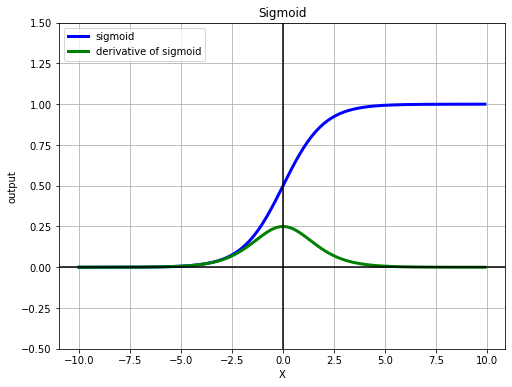

In [4]:
from __future__ import division
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Cost function and Optimization Objective for Logistic Regression

The objective function for logistic regression will be a little different. Instead of minimizing the sigmoid we'll **differentiate the negative log of the sigmoid**. We do this for a few reasons:
1. Math is easier, all the multiplications are converted to sums
2. Differentiation is easier
3. The function is smooth, hence differentiable.
4. Our probability values can be very low eg. 4e-45 which are messy to deal with, using log on them will convert the values to a more readable form. 
5. If we take only sigmoid, then the resulting function in non-convex function which will have local optimums. Hence, we log it to make it a convex function. 

Our loss function will be:
$$
\begin{equation}
    Cost(h_\theta(x), y)=
    \begin{cases}
        -log(h_\theta(x)), & \text{if}\ y=1 \\
        -log(1 - h_\theta(x)), & \text{if}\ y=0
    \end{cases}
\end{equation}
$$

Where, $h_\theta(x)$ is the sigmoid function
$$h_\theta(x) = \frac{1}{1 + e^{-x}}$$

Instead of writing two separate equations, we'll write it in one sigle form:

$$Cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)(log(1 - h_\theta(x)))$$

When y = 0, the left part of the equation automatically becomes 0. When y = 1 the right part of the equation automatically becomes 0. Hence, we have represented the same concept as above in a single equation. The same equation can also be obtained by the principle of __Maximum Likelihood Estimation__. 

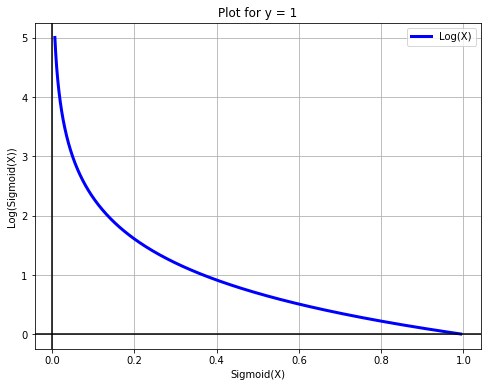

In [5]:
X = np.arange(-5, 5, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(sigmoid(X)), label='Log(X)', c='blue', linewidth=3)
plt.legend()
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('Log(Sigmoid(X))')
plt.title('Plot for y = 1')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

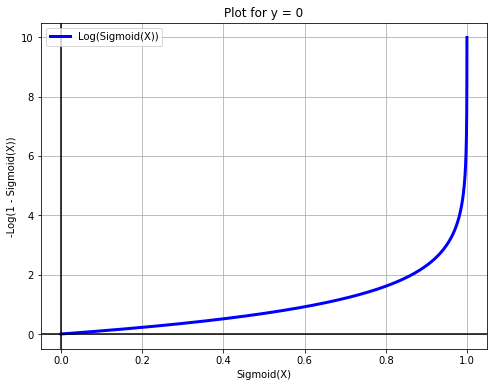

In [6]:
X = np.arange(-10, 10, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(1 - sigmoid(X)), label='Log(Sigmoid(X))', c='blue', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('-Log(1 - Sigmoid(X))')
plt.title('Plot for y = 0')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## Limitations of Logistic Regression

### Linear Classifier
Despite using the sigmoid non-linearity, the logistic regression classifier is still a ***linear combination*** of the inputs and hence is a **linear classifier**. The interpretation of this while building a classifier is, the classifier will always be a straight line. 

## Interpretation of Weights

In linear regression we have a simple interpretation. In the equation

$$h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+\theta_2\cdot x2+....$$

The interpretation of the weight is: the **change in $y$ by a unit change in $x$, given all the other $x$s remain constant**. But this changes a little bit in Logistic Regression. 

We have:

$$ \ln\left(\frac{p}{1-p}\right)=h_{\theta}\left(x\right)=\theta_0+\theta_1\cdot x_1+...$$

In a way we can say that Logistic Regression is linear regression on log-odds. So the interpretations of weights now become: **the amount of increase in log-odds by a unit change in an $x$ given other $x$s remain constant**. 

## Cost function

We've seen that the cost function for logistic regression is:

$$
J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right]
$$

```
# From Logistic Regression Class:
def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) \
               * (np.sum(np.log(self.sigmoid(dot_prod_pos))) 
                  + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
        return cost
```

Where $h_\theta (x^{(i)})$ is the Sigmoid function. In order to get the update rule we need to differentiate this. Firstly, we know that

$$\frac{\partial}{\partial x} \sigma(x) =  \sigma(x) \cdot (1 - \sigma(x))$$

In our case, we want to partial differentiate with respect to our paramters $\theta$. So we have

$$\frac{\partial }{\partial \theta }\sigma \left(f\right)=\sigma \left(f\right)\cdot \left(1-\sigma \left(f\right)\right)\frac{\partial }{\partial \theta }f$$

Where, 
$$f = \left(\theta_0+\theta_1x\right)$$

Hence, 
$$\frac{\partial}{\partial\theta_0}f=1$$
And,
$$\frac{\partial}{\partial\theta_1}f=x$$

But since we can append ones in our input matrix, we can simply replace $x_j$ as 1 in our equation to make life easier, 

$$\frac{\partial }{\partial \theta _j}\sigma \left(x\right)=\sigma \left(x\right)\cdot \left(1-\sigma \left(x\right)\right)x_j)$$

Where $x_j$ will be 1 for $\theta_0$

### Differentiating the negative likelihood

The way we chose to represent our cost function (by taking logs) is called as negative log likelihood. We'll differentiate it now to obtain the update rule


$
\begin{align}
\frac{\partial}{\partial \theta}J(\theta) &= \frac{\partial}{\partial \theta} \left[- \frac{1}{m}\sum_{i=0}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))] \right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{\partial}{\partial\theta}y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\frac{\partial}{\partial\theta}\left(\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right)\right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{h_{\theta}\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}h_{\theta}\left(x^{\left(i\right)}\right)+\frac{1-y^{\left(i\right)}}{1-h_{\theta}\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\left(-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right] \\
\text{Replacing h with sigma} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)+\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\left(-\sigma\left(x^{\left(i\right)}\right)\right)\right]\\
\text{Take the minus sign out} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)-\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{Take sigma common} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}}{\sigma\left(x^{\left(i\right)}\right)}-\frac{1-y^{\left(i\right)}}{1-\sigma\left(x^{\left(i\right)}\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}-y^{\left(i\right)}\cdot\sigma\left(x^{\left(i\right)}\right)-\sigma\left(x^{\left(i\right)}\right)+y^{\left(i\right)}\cdot\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{Cancel positive and negative terms} \\
&= -\frac{1}{m}\sum_{i=0}^m\left[\left(\frac{y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\right)\frac{\partial}{\partial\theta}\sigma\left(x^{\left(i\right)}\right)\right] \\
\text{We know the gradient of sigma} \\
&=  -\frac{1}{m}\sum_{i=0}^m\left[\frac{y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)}{\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)}\cdot\sigma\left(x^{\left(i\right)}\right)\cdot\left(1-\sigma\left(x^{\left(i\right)}\right)\right)x^{\left(i\right)}_{j}\right] \\
\text{Numerator and Denominator cancel out!} \\
&= -\frac{1}{m}\sum_{i=0}^m\left(y^{\left(i\right)}-\sigma\left(x^{\left(i\right)}\right)\right)x_j^{\left(i\right)} \\
&= \frac{1}{m}\sum_{i=0}^m
\left(\sigma (x^{\left(i\right)})-y^{\left(i\right)}\right)x_j^{\left(i\right)} \\
\end{align} \\
$

```
def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        return h
```
## Update Rule for thetas

Taking the negative sign inside in the last equation, we have our update rule

### $\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}$

In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('data/ml-ex2/ex2data1.csv', header=None)
df.rename(columns={0: 'exam1', 1: 'exam2', 2: 'y'}, inplace=True)
df.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


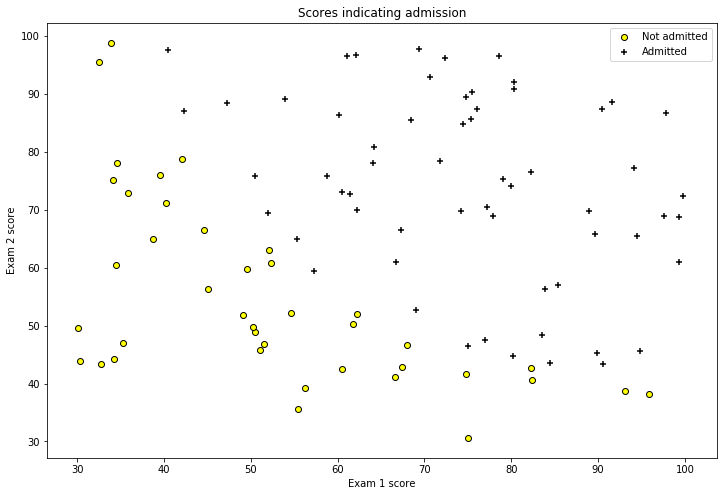

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['exam1'], df[df['y'] == 0]['exam2'],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['exam1'], df[df['y'] == 1]['exam2'],
            label='Admitted', marker='+', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

In [10]:
class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000):
        self.X = self._hstack_one(X)
        self.y = y
        self.thetas = np.zeros((self.X.shape[1]))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.4f}".format(self.cost()))

    @staticmethod
    def _hstack_one(input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack(
                (np.ones((input_matrix.shape[0], 1)), input_matrix))

    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(-X))

    def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        cost = -(1 / self.n_rows) \
               * (np.sum(np.log(self.sigmoid(dot_prod_pos))) 
                  + np.sum(np.log(1 - self.sigmoid(dot_prod_neg))))
        return cost

    def predict(self, new_X, threshold=0.5):
        assert new_X.shape[0] != self.X.shape[1], \
            "Number of features don't match. {0} != {1}"\
                .format(new_X.shape[1], self.X.shape[1])
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        return self.sigmoid(h) >= threshold

    def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        return h

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("\rIteration: {0} Loss: {1:.5f}".format(i + 1, cost) + "")
        print()

    def scipy_optimize(self, ):
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient,
                          options={'maxiter': self.n_iterations})
        print(result)
        self.thetas = result.x

In [13]:
model = LogisticRegression(df[['exam1', 'exam2']].values, df['y'].values, n_iterations=20000, alpha=0.001)
optim_theta = model.scipy_optimize()
print("Cost after converging: {0:.3f}".format(model.cost()))

Cost before fitting: 0.6931
      fun: 0.20349770159874742
 hess_inv: array([[ 2.06183487e+01, -1.67128121e-01, -1.79205409e-01],
       [-1.67128121e-01,  1.42507960e-03,  1.38926151e-03],
       [-1.79205409e-01,  1.38926151e-03,  1.62897968e-03]])
      jac: array([-3.49236922e-07, -2.25163939e-05, -2.39118286e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 327
      nit: 78
     njev: 310
   status: 2
  success: False
        x: array([-25.16133275,   0.20623171,   0.20147159])
Cost after converging: 0.203


/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


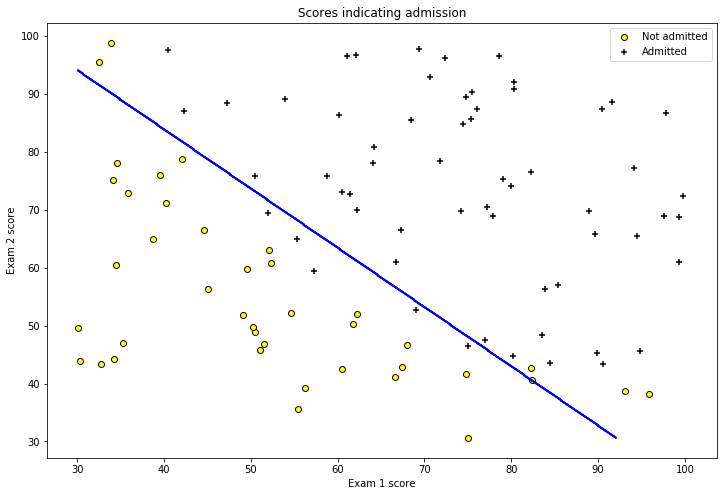

In [14]:
# Plotting the prediction line
col1 = "exam1"
col2 = "exam2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()

min_ex2 = df[col2].min()
max_ex2 = df[col2].max()

arange_step = 0.1

xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                     np.arange(min_ex2, max_ex2, arange_step))
preds = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(preds)
preds = preds.reshape(xx.shape)
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
            label='Admitted', marker='+', color='black')
plt.contour(xx, yy, preds, colors='blue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

## Regularization

Machine Learning models sometimes fit the data too well. This causes a problem because the model won't generalize well with real world data. Consider the following

<img 
src="https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/overfitting-logreg-ex.png" 
/>

The $R^2$ value, a commonly used measure to evaluate models, will clearly be high for the model since the data fits very good and the user will be tricked into believing that the mode is perfect but in reality the model is very bad and won't work with unseen data. 

A way to deal with the problem is to use Regularization. There are multiple ways to use Regularization, we'll see that in the following posts.  

Furthermore, Regularization also helps to solve the Bais-Variance tradeoff. 

Source: [ML Coursera](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjugomJysPYAhUQ4o8KHcqwCs8QFgg-MAA&url=https%3A%2F%2Fwww.coursera.org%2Flearn%2Fmachine-learning&usg=AOvVaw2zgTKaHlTbWua1rRu2TcP9)

## Norms

Norm is nothing but a way to measure distance between two vectors. Generally, it's used to measure the distance between the origin and vector. There are many forms of Norms, but for our purposes, we'll use $L_1$ and $L_2$ norm. 

### $L_1$ Norm or Mean Absolute Error

Consider a vector x = \[B1 B2\] Then the $L_1$ norm is simply the addition of the two numbers inside it. 

Mathematically, $L_1$ Norm is denoted by the following equation

### $$\lVert x \rVert_1=\sum_{i=0}^n\left|x_i\right|$$

### $L_2$ Norm or Root Mean Squared Error

The only difference in the $L_2$ norm is we take the addition of the squares of all the numbers and take its square root. 

Mathematically, $L_2$ Norm is denoted by the following equation

### $$\lVert x \rVert_2 = \sqrt{\sum_{i=0}^nx_i^2}$$


### Example
Consider a vector
$$
x =
    \begin{bmatrix}
    \beta_0 \\
    \beta_1
    \end{bmatrix}
$$

Then $L_1$ norm will be
$$\lVert x \rVert_1= \beta_0 + \beta_1$$

And $L_2$ norm will be
$$\lVert x \rVert_1= \sqrt{\beta_0^2+\beta_1^2}$$

Graphically, if you plot the vector considering $\beta_0$ as x-coordinate and $\beta_1 $as y coordinate. Then $L_1$ norm is simply the addition of the two sides of the traingles formed and $L_2$ is the hypotenuse. The drawing below will make it clear (excuse my poor handwriting :))


<img src="images/vector_norm.png" height=300 width=500/>

## Adding Regulariaztion Parameter

Consider the cost function of Logistic Regression from the previous post which is given by

$$
J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right]
$$

We add the term  $\lambda \lVert \theta \rVert_2 ^2$ to it, where $\lambda$ is a constant that user gets to decide. It's also called as __Regularization Parameter__. Mathematically, it's a Lagrange multiplier that's minimising the cost function $J\left(\theta\right)$.

Adding the $\lambda$ term to the equation makes the cost function for Logistic Regression as:

$$J\left(\theta\right)=-\frac{1}{m}\sum_{i=0}^m\left[y^{\left(i\right)}\log\left(h_{\theta}\left(x^{\left(i\right)}\right)\right)+\left(1-y^{\left(i\right)}\right)\log\left(1-h_{\theta}\left(x^{\left(i\right)}\right)\right)\right] + 
\lambda \lVert \theta \rVert_2 ^2$$

Note the notation we used, the 2 at the bottom of $\theta$ indicates that's a $L_2$ norm, hence, technically we're using Ridge Regression (We'll see shortly what it is). Normally this piece of notation is ignored since whenever we indicate norm we're almost always using the $L_2$ norm and not the $L_1$ one. But we'll be explicit about it since it's the subtle difference between Ridge and Lasso Regression. 

#### Note:
If $\lambda$ is:
1. __too high__: The values will be heavily penalized and __underfitting__ will occur. 
2. __too low__: There'll be no regularization, we'll be where we started from and the model will __overfit__. 



## Types of Regularization

Two types of Regularization we'll see are Ridge, and LASSO. 

### 1. Ridge
Notice how in the above equation we used $L_2$ norm. That's the key point of Ridge Regularization. 

### 2. LASSO (Least Absolute Shrinkage and Selection Operator)
Here instead of the $L_2$ norm, we take $L_1$ norm. This type of regularization is rarely used. 

### 3. ElasticNet
This combines both Ridge and LASSO hence uses both $L_1$ and $L_2$ norms. 

## When to use $L_1$ (MAE) vs $L_2$ (RMSE) 

Since RMSE squares the differences this has the effect of penalizing large errors more than lower errors. For instance penalizing an error of 10 is __more than twice__ than penalizing the error of 5. 

But in the case of MAE penalizing an error of 10 is __twice__ the penalizing the error of 5. Hence whenever you want to penalizing linearly you ought to choose MAE over RMSE else the other way around. 

## Polynomial Regression

Polynomial Regression is the same as Linear Regression but we're adding polynomial features to the dataset. For instance if we have two features $x_1$, and $x_2$. We'll add $x_1^2$, $x_2^2$, $x_1x_2$, $x_1^3$ and so on. Adding these features will give us a non-linear fit, i.e. a boundary that's not simple plain line. 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('machine_learning_andrewng/ex2data2.csv', header=None)
df.rename(columns={0: 'chip1', 1: 'chip2', 2: 'y'}, inplace=True)
df.head()

,chip1,chip2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


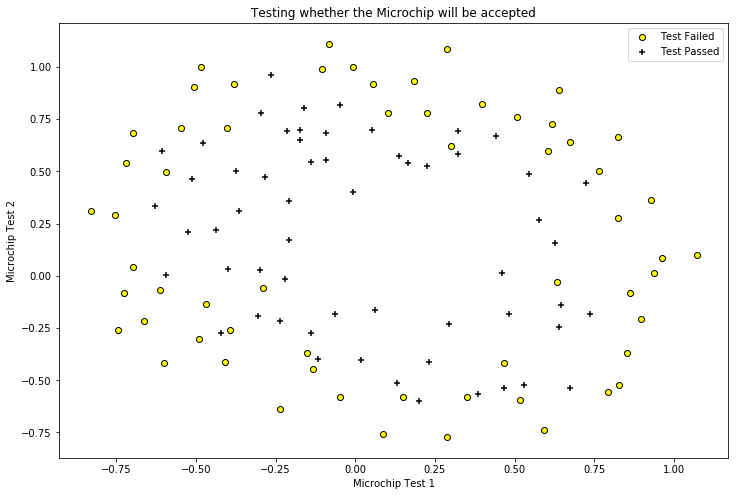

In [2]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['chip1'], df[df['y'] == 0]['chip2'],
            label='Test Failed', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['chip1'], df[df['y'] == 1]['chip2'],
            label='Test Passed', marker='+', color='black')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.title('Testing whether the Microchip will be accepted')
plt.show()

In [4]:
class LogisticRegression(object):
    def __init__(self, X, y, alpha=0.001, n_iterations=5000,
                 lambda_param=0, verbose=True):
        self.y = self._handle_data_type(y)
        self.X = self._handle_data_type(X)
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1]))
        self.n_rows = self.X.shape[0]
        self.n_features = self.thetas.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.lambda_param = lambda_param
        if verbose:
            print "Number of features: {0}".format(self.n_features - 1)
            print "Cost before fitting: {0:.4f}".format(self.cost())
    
    @staticmethod
    def _handle_data_type(new_X):
        return new_X
    
    @staticmethod
    def _hstack_one(input_matrix):
        if len(input_matrix.shape) == 1:
            return np.hstack((np.array([1]), input_matrix))
        else:
            return np.hstack((np.ones((input_matrix.shape[0], 1)), input_matrix))
        
    @staticmethod
    def sigmoid(X):
        return 1/(1 + np.exp(-X))
        
    def cost(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        dot_prod = self.X.dot(thetas)
        dot_prod_pos = dot_prod[self.y == 1]
        dot_prod_neg = dot_prod[self.y == 0]
        # TODO: Add limit parameter to prevent
        # log underflow
        # https://stackoverflow.com/a/47244817/1878563
        cost = -(1/self.n_rows) * (np.sum(np.log(self.sigmoid(dot_prod_pos))) \
                                + np.sum(np.log(1 - self.sigmoid(dot_prod_neg)))) \
                         + (self.lambda_param/(2*self.n_rows)) \
                     * np.sum(self.thetas[1:]**2)
        return cost
    
    def predict(self, new_X, threshold=0.5):
        new_X = self._handle_data_type(new_X)
        assert new_X.shape[0] != self.X.shape[1], \
            "Number of features don't match. {0} != {1}".format(new_X.shape[1],
                                                                self.X.shape[1])
        new_X = self._hstack_one(new_X)
        h = new_X.dot(self.thetas)
        results = self.sigmoid(h) >= threshold
        return results
    
    def batch_gradient(self, thetas=None):
        if thetas is None:
            thetas = self.thetas
        h = self.sigmoid(self.X.dot(thetas)) - self.y
        h = np.multiply(self.X, h.reshape(-1, 1))
        h = np.sum(h, axis=0)
        reg = thetas * self.lambda_param
        reg[0] = 0 # don't regularize theta_0
        h += reg
        return h
    
    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha/self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print "\rIteration: {0} Loss: {1:.5f}".format(i + 1, cost)  + "",
        print
    
    def scipy_optimize(self, verbose=True):
        result = minimize(self.cost, self.thetas, jac=self.batch_gradient, 
                          options={'maxiter': self.n_iterations})
        if verbose:
            print result
        self.thetas = result.x

### Simple Logistic Regression

In [19]:
simple_lr = LogisticRegression(df[['chip1', 'chip2']].values, df['y'].values, n_iterations=20000)
simple_lr.scipy_optimize()

Number of features: 2
Cost before fitting: 0.6931
      fun: 0.69024112201698
 hess_inv: array([[ 0.03954989, -0.0116338 , -0.02684334],
       [-0.0116338 ,  0.14515993,  0.02196225],
       [-0.02684334,  0.02196225,  0.14320469]])
      jac: array([ -8.04472319e-06,  -5.74084101e-07,  -1.09410551e-06])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 48
     njev: 165
   status: 0
  success: True
        x: array([-0.01418441, -0.30352114, -0.01813174])


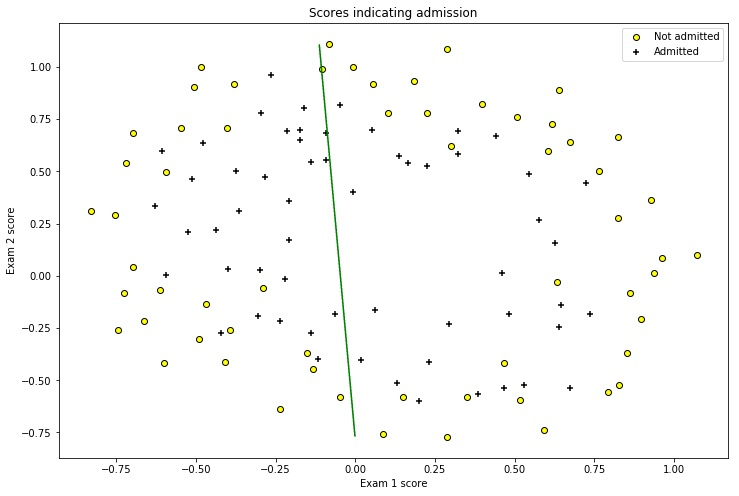

In [27]:
# Plotting the prediction line
def plot(col1, col2, clf):
    min_ex1 = df[col1].min()
    max_ex1 = df[col1].max()

    min_ex2 = df[col2].min()
    max_ex2 = df[col2].max()

    arange_step = 0.001

    xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                         np.arange(min_ex2, max_ex2, arange_step))
    preds = np.c_[xx.ravel(), yy.ravel()]
    preds = clf.predict(preds)
    preds = preds.reshape(xx.shape)
    fig = plt.figure(figsize=(12, 8))
    plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
                label='Not admitted', color='yellow', edgecolor='black')
    plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
                label='Admitted', marker='+', color='black')
    plt.contour(xx, yy, preds, [0.5], colors='green')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc='upper right')
    plt.title('Scores indicating admission')
    plt.show()
    
plot("chip1", "chip2", simple_lr)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
X = df[['chip1', 'chip2']].values
kernel = PolynomialFeatures(6)
X = kernel.fit_transform(X)
X = X[:, 1:]
y = df['y'].values
print X.shape
poly_lr = LogisticRegression(X, y, lambda_param=100, n_iterations=20000)
poly_lr.scipy_optimize()

(118, 27)
Number of features: 27
Cost before fitting: 0.6931
      fun: 0.6802434024711351
 hess_inv: array([[  4.23984171e-02,  -1.71383426e-02,  -2.38290924e-04,
          2.02861892e-02,  -6.47610740e-03,   1.91629457e-02,
         -9.82653723e-03,   1.15108124e-03,  -6.28776882e-04,
         -9.07568393e-03,   2.63613455e-03,  -2.90371388e-03,
          3.82792244e-03,  -2.61956629e-03,  -5.14944483e-03,
         -8.39710563e-03,   3.99420393e-05,  -5.48575475e-04,
         -5.21552667e-06,  -3.66343522e-04,  -1.59309471e-02,
         -3.17290267e-03,  -1.79242705e-03,   1.19858370e-03,
         -9.13433031e-04,   4.91298557e-04,  -1.54604264e-03,
         -1.54675705e-02],
       [ -1.71383426e-02,   5.12692985e-01,  -1.18408858e-01,
         -1.82832779e-01,   1.28144257e-01,  -1.17568724e-01,
         -2.81545853e-01,   5.64146455e-02,  -4.17312757e-02,
          5.04789812e-02,  -5.61753462e-02,   1.09395661e-02,
          2.47817442e-02,   2.63464881e-02,   9.62040081e-02,
   

/home/uzumaki/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


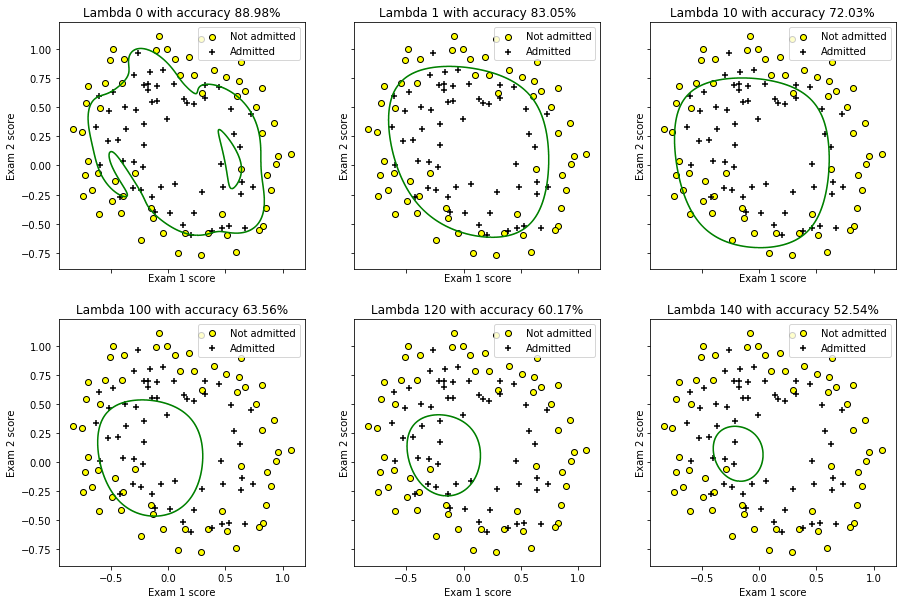

In [21]:
# visualizing the effect
X = df[['chip1', 'chip2']].values
kernel = PolynomialFeatures(6)
X = kernel.fit_transform(X)
X = X[:, 1:]
y = df['y'].values

col1 = "chip1"
col2 = "chip2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()
min_ex2 = df[col2].min()
max_ex2 = df[col2].max()
arange_step = 0.001
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                        np.arange(min_ex2, max_ex2, arange_step))

lambdas = [0, 1, 10, 100, 120, 140]
for index, lambda_param in enumerate(lambdas):
    poly_lr = LogisticRegression(X, y, lambda_param=lambda_param, verbose=False)
    poly_lr.scipy_optimize(verbose=False)
    preds = np.c_[xx.ravel(), yy.ravel()]
    accuracy = 100*(np.sum(poly_lr.predict(X) == y)/y.size)
    preds = kernel.transform(preds)
    preds = preds[:, 1:]
    preds = poly_lr.predict(preds)
    preds = preds.reshape(xx.shape)
    fl_axes = axes.flatten()[index]
    fl_axes.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
                    label='Not admitted', color='yellow', edgecolor='black')
    fl_axes.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
                    label='Admitted', marker='+', color='black')
    fl_axes.contour(xx, yy, preds, [0.5], colors='green')
    fl_axes.set_xlabel('Exam 1 score')
    fl_axes.set_ylabel('Exam 2 score')
    fl_axes.legend(loc='upper right')
    fl_axes.set_title("Lambda {0} with accuracy {1:.2f}%".format(lambda_param, accuracy))
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from scipy.special import logit

%matplotlib inline

In [35]:
data = np.loadtxt('data/ml-ex2/ex2data1.txt', delimiter=',')

In [36]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))

In [37]:
# LogisticRegression estimator expect an y row vector
y = y.ravel()


**Logistic regression hypothesis:** 
$$ h_ \theta (x) =   g(\theta^Tx )  $$



**Sigmoid function:** 
$$ g (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z}}  $$ 

**Cost function in logistic regression:**
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m[ - y^{(i)} log(h_\theta  (x^{(i)})) – (1 – y^{(i)}) log(1-h_\theta  (x^{(i)}))]  $$



**The gradient of the cost is a vector of the same length as $ \theta $ where the $ j^{th} $ element (for j = 0, 1, . . . ,n) is defined as follows:**

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$



### Unregularized logistic regression

In [38]:
# Use 'lbfgs' solver for logistic regression as this is what Octave fminunc does.
# Parameter C ist the inverse regularization strength (high values = low regularization).
# Note that regularization is applied by default.
clf = LogisticRegression(C=1e9, solver='lbfgs')
clf.fit(X, y)

LogisticRegression(C=1000000000.0)

In [39]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]
print(theta0, theta1, theta2)

-25.16138567101981 0.20623222395628113 0.20147190519771901


In [40]:
# Computes x2 at y = logit(0.5) from x1 and model parameters
# based on equation y = sigmoid(theta0 + theta1*x1 + theta2*x2)
# where logit is the inverse of sigmoid.
# (used for computing the linear decision boundary)
def x2(x1):
    return (logit(0.5) - theta0 - theta1*x1) / theta2

In [41]:
x1_min = X[:,0].min()
x1_max = X[:,0].max()

In [42]:
# x1 and x2 data of linear decision boundary
x1_plot = np.array([x1_min, x1_max])
x2_plot = x2(x1_plot)

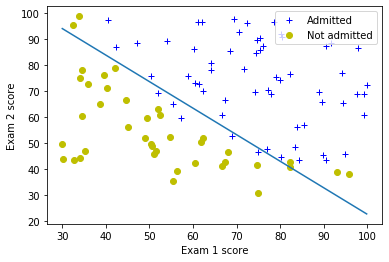

In [43]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples and decision boundary
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Admitted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend(loc='upper right')

# Plot decision boundary
ax.plot(x1_plot, x2_plot)

In [44]:
X_test = np.array([
    [45., 85.],
    [50., 50.],
    [80., 80.]
])

In [45]:
# Predict class
clf.predict(X_test)

array([1., 0., 1.])

In [46]:
# Predict class probabilities
np.set_printoptions(precision=4,suppress=True)
clf.predict_proba(X_test)

array([[0.2237, 0.7763],
       [0.9916, 0.0084],
       [0.0006, 0.9994]])

In [47]:
theta0 = clf.intercept_[0]
theta1 = clf.coef_[0,0]
theta2 = clf.coef_[0,1]

In [48]:
theta0, theta1, theta2

(-25.16138567101981, 0.20623222395628113, 0.20147190519771901)

In [49]:
# Classification accuracy on training set
clf.score(X, y)

0.89

### Regularized logistic regression

**Regularized logistic regression:**
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m[ - y^{(i)} log(h_\theta  (x^{(i)})) – (1 – y^{(i)}) log(1-h_\theta  (x^{(i)}))] + \frac{1}{2m} \sum_{j=1}^n \theta_j^2 $$



**The gradient for $ j \ge 1 $ :**

$$ \frac{\partial J(\theta)}{\partial \theta_j} = ( \frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} ) + \frac{\lambda}{m}\theta_j $$ 



In [50]:
# Microchip test: 
# - test 1 (x1) 
# - test 2 (x2)
# - accepted=1, rejected=0 (y)
data = np.loadtxt('data/ml-ex2/ex2data2.txt', delimiter=',')

In [51]:
# LogisticRegression estimator expect an y row vector
X, y = np.hsplit(data, np.array([2]))

In [52]:
# Logistic regression estimator requires an y row vector
y = y.ravel()

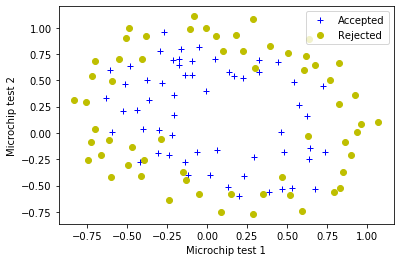

In [53]:
fig, ax = plt.subplots()

# Mask for selecting positive and negative examples
y_pos = y == 1
y_neg = y == 0

# Plot examples
ax.plot(X[y_pos,0], X[y_pos,1], 'b+', label='Accepted')
ax.plot(X[y_neg,0], X[y_neg,1], 'yo', label='Rejected')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')
ax.legend(loc='upper right')

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [21]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# Note that regularization is applied by default.
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
#  Similar to the previous parts, you will use fminunc to learn the optimal parameters theta. 
# 'lbfgs' takes care of this
clf = LogisticRegression(C=1.0, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [22]:
# Classification accuracy on training set
model.score(X, y)

0.8305084745762712

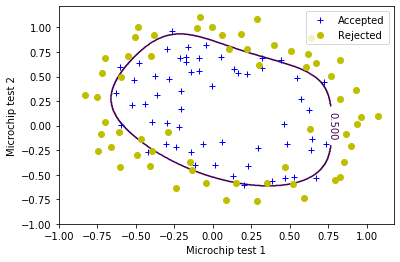

In [23]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig

### Overfit

In [54]:
# Preprocessor to include polynomial features up to degree 6
poly = PolynomialFeatures(6, include_bias=False)

# Mean and standard deviation scaler
scaler = StandardScaler()

# Logistic regression classifier. 
# Note that regularization is applied by default.
# - C=1.0 will result in good fit
# - C=1e4 will result in overfit (to little regularization)
# - C=1e-2 will result in underfit (to much regularization)
#  Similar to the previous parts, you will use fminunc to learn the optimal parameters theta. 
# 'lbfgs' takes care of this
clf = LogisticRegression(C=100000, solver='lbfgs')

# Pipeline of polynomial feature generator, feature scaler and linear regressor
model = Pipeline([('poly', poly), ('scaler', scaler), ('clf', clf)])

# Fit data to model
model.fit(X, y)

/Users/sadeed/opt/anaconda3/envs/my37env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(C=100000))])

In [55]:
# Classification accuracy on training set
model.score(X, y)

0.8559322033898306

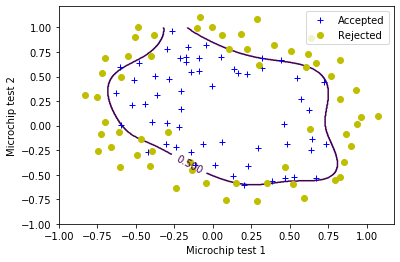

In [56]:
grid = np.mgrid[-1:1:500j, -1:1:500j]

# Compute acceptance probabilities on 500*500 grid 
X_grid = np.c_[grid[0].ravel(), grid[1].ravel()]
y_grid = model.predict(X_grid).reshape(grid[0].shape)

# Plot decision boundary on previous figure
cs = ax.contour(grid[0], grid[1], y_grid, 'g-', levels=[0.5])
ax.clabel(cs)

# Show previous figure with decision boundary
fig